In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import collections
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from grid_method import *
from model import GHH

# 1d cases

In [133]:
def get_region_1d(grad):
    grad_n = grad.numpy()
    grad_n = grad_n.reshape(-1)
    sp = grad_n.shape
    grad_n = grad_n.astype(str)
    _, dist = np.unique(grad_n, return_inverse = True)
    dist = dist.reshape(sp)
    return dist

In [134]:
def view_1d(d, output, region):
    d_n = d.detach().numpy().reshape(-1)
    output_n = output.detach().numpy().reshape(-1)
    n_region = len(set(region))
    regions = list(set(region))
    # choose colors
    cmp = plt.get_cmap("viridis")
    colors = cmap(np.linspace(0,1,n_region))
                 
    fig = plt.figure(figsize=(14, 8))
    
    plt.plot(d_n,output_n)
    for i, (r, color) in enumerate(zip(regions, colors), 1):
        ids = np.arange(len(d_n))
        ids_c = ids[region == r]
        d_n_c = d_n[ids_c]
        output_n_c = output_n[ids_c]
        plt.scatter(d_n_c, output_n_c, s=2.5)
        plt.axvspan(d_n_c[0], d_n_c[-1], facecolor=color, alpha=0.5)         
    plt.xlabel("x")
    plt.ylabel("output of GHH")
    plt.title("1D visualization",fontsize=25)
    plt.show()

In [135]:
k = 5

In [136]:
d = torch.linspace(-10, 10, 2001)
d = torch.reshape(d, (-1,1))
d.requires_grad_(True)
ghh = GHH(d, 1, k)
output = ghh(d)
output.backward(torch.ones_like(output))
grad = d.grad
reg = get_region_1d(grad)

In [67]:
set(reg)

{0, 1, 2, 3, 4, 5}

In [69]:
len(reg[reg == 0])

36

In [70]:
len(reg[reg == 1])

239

In [71]:
len(reg[reg == 2])

729

In [72]:
len(reg[reg == 4])

899

In [73]:
len(reg[reg == 3])

3

In [74]:
len(reg[reg == 5])

95

In [75]:
d.detach().numpy().reshape(-1)[reg==3]

array([-0.05999992, -0.04999992, -0.03999992], dtype=float32)

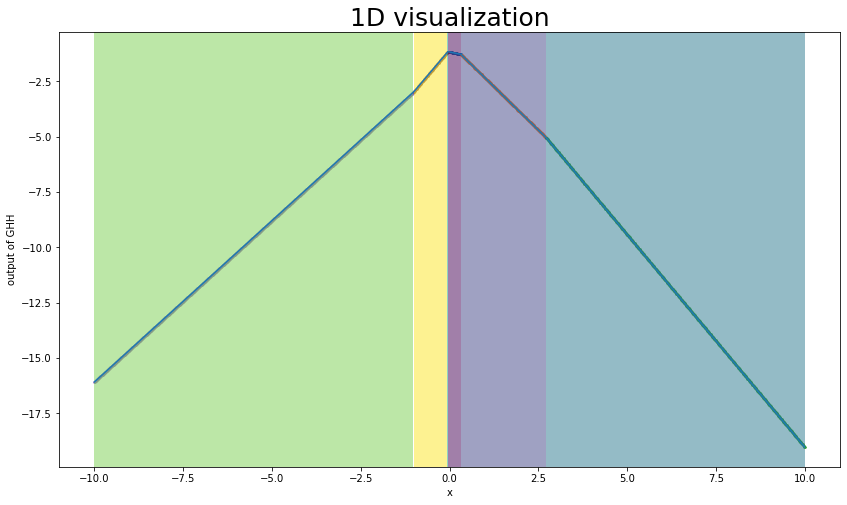

In [68]:
view_1d(d, output, reg)

# variation of the norm of the gradient of 1d model w.r.t. the value of K 

In [137]:
def norm(data):
    mean = torch.abs(data).mean()
    std = torch.abs(data).std()
    return mean.item(), std.item()

In [138]:
def test_norm(dim, ks, n_iter):
    avg_ms = []
    avg_stds = []
    for k in ks:
        stats = torch.empty(n_iter, 2)
        for i in range(n_iter):
            d = torch.linspace(-20, 20, 2001)
            d = d.reshape(-1,1)
            d.requires_grad_(True)
            ghh = GHH(d, dim, k)
            output = ghh(d)
            output.backward(torch.ones_like(output))
            m, std = norm(d.grad)
            stats[i,0] = m
            stats[i,1] = std
        avg_m = stats.mean(axis = 0)[0].item()
        avg_std = stats.mean(axis = 0)[1].item()
        avg_ms.append(avg_m)
        avg_stds.append(avg_std)
    return avg_ms, avg_stds

In [146]:
dim = 1; ks = np.array([1,5,10,50,100,500,1000,5000,10000]);
ks

array([    1,     5,    10,    50,   100,   500,  1000,  5000, 10000])

In [147]:
ms_1, stds_1 = test_norm(dim, ks, 10)
ms_2, stds_2 = test_norm(dim, ks, 100)
ms_3, stds_3 = test_norm(dim, ks, 1000)
#ms_4, stds_4 = test_norm(dim, ks, 10000)

KeyboardInterrupt: 

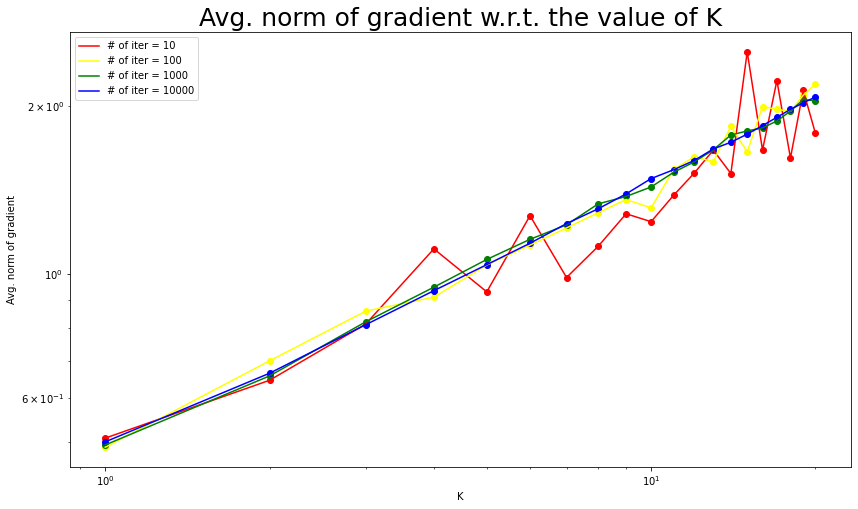

In [142]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,ms_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks,ms_3, label = '# of iter = 1000',c = 'green')
plt.plot(ks,ms_4, label = '# of iter = 10000',c = 'blue')
plt.legend()
plt.scatter(ks, ms_1, c = 'red') 
plt.scatter(ks, ms_2, c = 'yellow') 
plt.scatter(ks, ms_3, c = 'green') 
plt.scatter(ks, ms_4, c = 'blue') 
plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

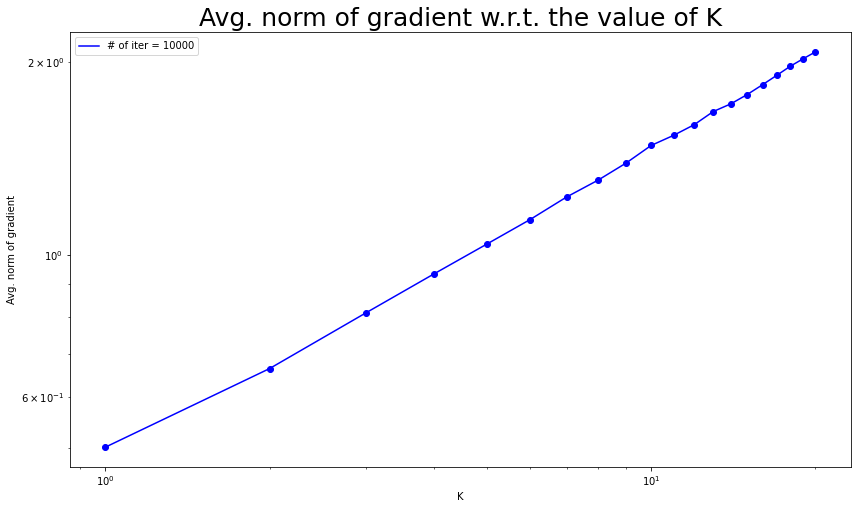

In [143]:
fig = plt.figure(figsize=(14, 8))
    

plt.plot(ks,ms_4, label = '# of iter = 10000',c = 'blue')
plt.legend()

plt.scatter(ks, ms_4, c = 'blue') 
plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

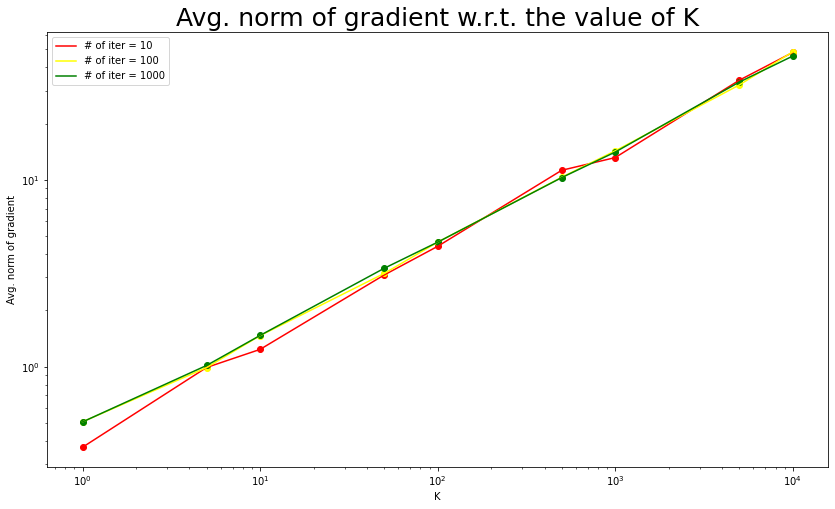

In [148]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,ms_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks,ms_3, label = '# of iter = 1000',c = 'green')

plt.legend()
plt.scatter(ks, ms_1, c = 'red') 
plt.scatter(ks, ms_2, c = 'yellow') 
plt.scatter(ks, ms_3, c = 'green') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

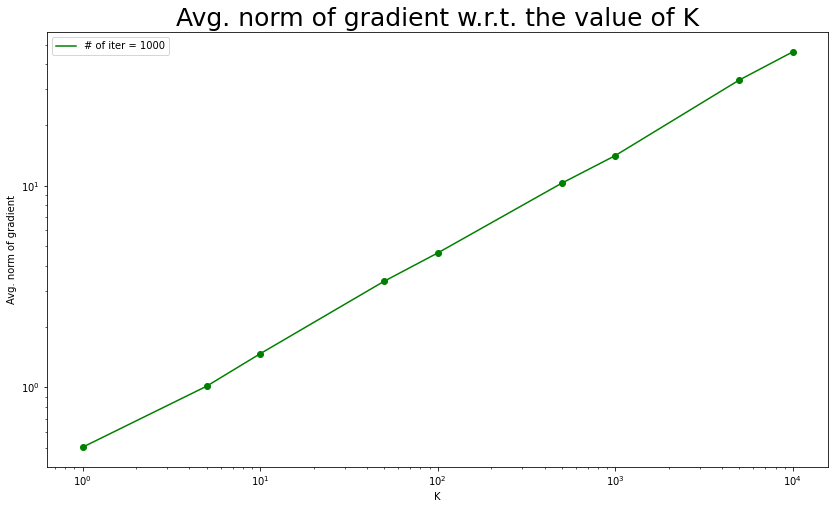

In [149]:
fig = plt.figure(figsize=(14, 8))
    

plt.plot(ks,ms_3, label = '# of iter = 1000',c = 'green')

plt.legend()

plt.scatter(ks, ms_3, c = 'green') 

plt.loglog()
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

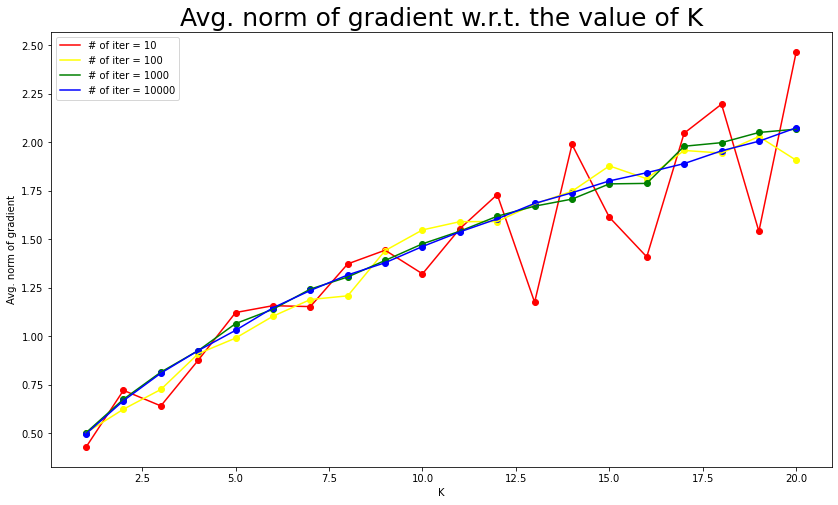

In [122]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,ms_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,ms_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks,ms_3, label = '# of iter = 1000',c = 'green')
plt.plot(ks,ms_4, label = '# of iter = 10000',c = 'blue')
plt.legend()
plt.scatter(ks, ms_1, c = 'red') 
plt.scatter(ks, ms_2, c = 'yellow') 
plt.scatter(ks, ms_3, c = 'green') 
plt.scatter(ks, ms_4, c = 'blue') 
plt.xlabel("K")
plt.ylabel("Avg. norm of gradient")
plt.title("Avg. norm of gradient w.r.t. the value of K",fontsize=25)
plt.show()

## distribution of the norm

In [3]:
def norm_dist(k, dim, n_iter):
    for i in range(n_iter):
        d = torch.linspace(-20, 20, 2001)
        d = d.reshape(-1,1)
        d.requires_grad_(True)
        ghh = GHH(d, dim, k)
        output = ghh(d)
        output.backward(torch.ones_like(output))
        norm = torch.abs(d.grad)
        
        if i==0:
            norm_record = norm.numpy().transpose()
        else:
            norm_record = np.vstack((norm_record, norm.numpy().transpose()))
            
    return norm_record

In [4]:
norm = norm_dist(3, 1, 10000)

In [5]:
norm_flat = norm.reshape(-1)

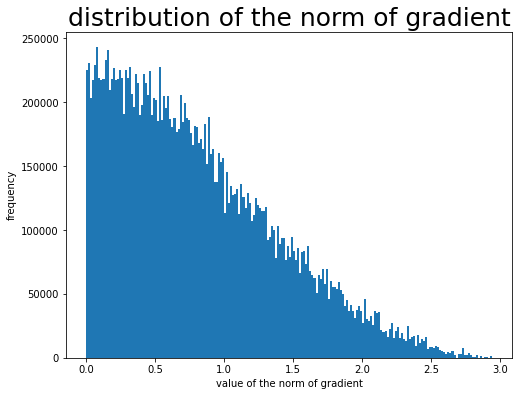

In [8]:
fig = plt.figure(figsize=(8, 6))
plt.hist(norm_flat, bins = 200)
plt.xlabel("value of the norm of gradient")
plt.ylabel("frequency")
plt.title("distribution of the norm of gradient",fontsize=25)
plt.show()

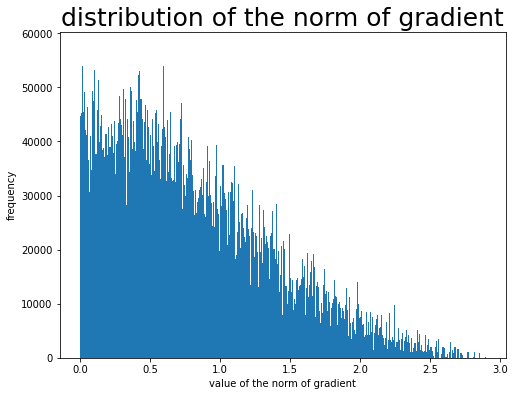

In [126]:
fig = plt.figure(figsize=(8, 6))
plt.hist(norm_flat, bins = 1000)
plt.xlabel("value of the norm of gradient")
plt.ylabel("frequency")
plt.title("distribution of the norm of gradient",fontsize=25)
plt.show()

## variation of nb of regions w.r.t. the value of K

In [127]:
def test_nb_region(dim, ks, n_iter):
    avg_nbs = []
    #avg_nb_stds = []
    for k in ks:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-20, 20, 2001)
            d = d.reshape(-1,1)
            d.requires_grad_(True)
            ghh = GHH(d, dim, k)
            output = ghh(d)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        
    return avg_nbs

In [128]:
dim = 1; ks = np.arange(1,21);

In [129]:
nbs_1 = test_nb_region(dim, ks, 10)
nbs_2 = test_nb_region(dim, ks, 100)
nbs_3 = test_nb_region(dim, ks, 1000)
nbs_4 = test_nb_region(dim, ks, 10000)

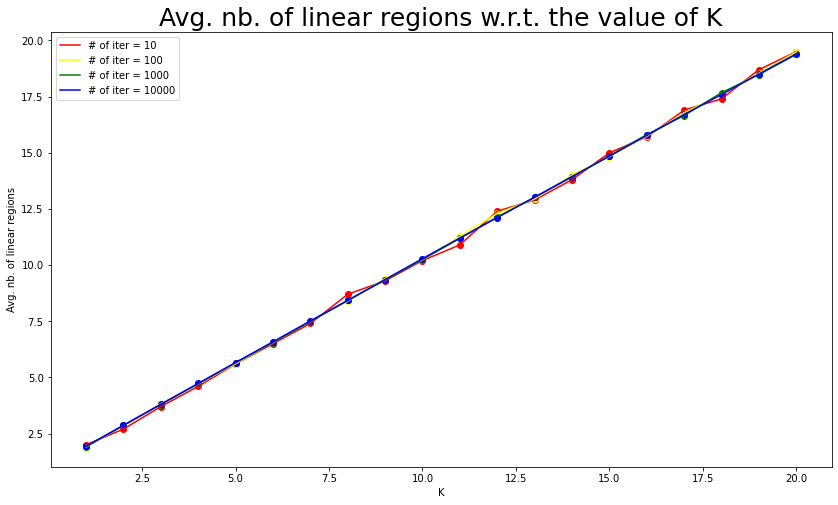

In [116]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,nbs_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,nbs_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'green')
plt.plot(ks,nbs_4, label = '# of iter = 10000',c = 'blue')
plt.legend()
plt.scatter(ks, nbs_1, c = 'red') 
plt.scatter(ks, nbs_2, c = 'yellow') 
plt.scatter(ks, nbs_3, c = 'green') 
plt.scatter(ks, nbs_4, c = 'blue') 
plt.xlabel("K")
plt.ylabel("Avg. nb. of linear regions")
plt.title("Avg. nb. of linear regions w.r.t. the value of K",fontsize=25)
plt.show()

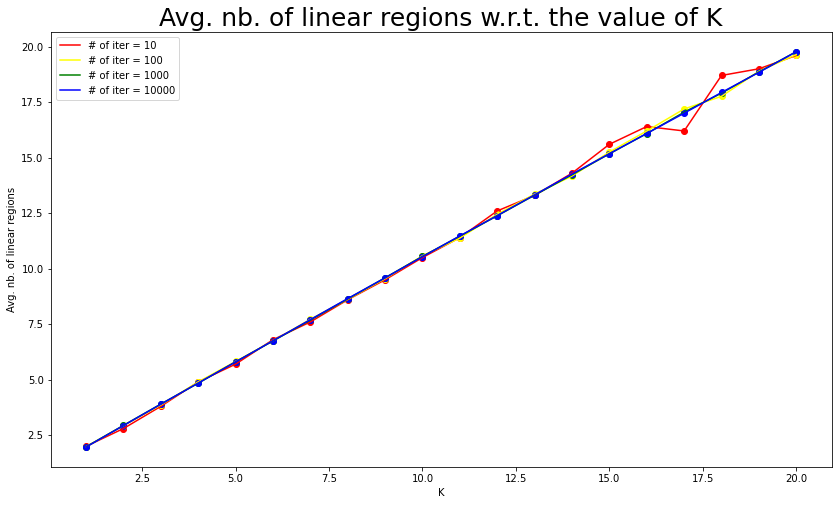

In [130]:
fig = plt.figure(figsize=(14, 8))
    
plt.plot(ks,nbs_1, label = '# of iter = 10',c = 'red')
plt.plot(ks,nbs_2, label = '# of iter = 100',c = 'yellow')
plt.plot(ks,nbs_3, label = '# of iter = 1000',c = 'green')
plt.plot(ks,nbs_4, label = '# of iter = 10000',c = 'blue')
plt.legend()
plt.scatter(ks, nbs_1, c = 'red') 
plt.scatter(ks, nbs_2, c = 'yellow') 
plt.scatter(ks, nbs_3, c = 'green') 
plt.scatter(ks, nbs_4, c = 'blue') 
plt.xlabel("K")
plt.ylabel("Avg. nb. of linear regions")
plt.title("Avg. nb. of linear regions w.r.t. the value of K",fontsize=25)
plt.show()

D:\Anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


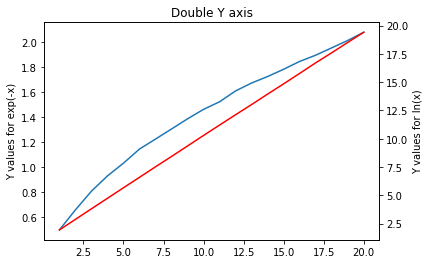

In [117]:
x = np.arange(0., np.e, 0.01)
y1 = np.exp(-x)
y2 = np.log(x)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(ks, ms_4)
ax1.set_ylabel('Y values for exp(-x)')
ax1.set_title("Double Y axis")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(ks, nbs_4, 'r')
ax2.set_ylabel('Y values for ln(x)')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

plt.show()

In [ ]:
def test_nb_region(dim, ks, n_iter):
    avg_nbs = []
    #avg_nb_stds = []
    for k in ks:
        stats = torch.empty(n_iter, 1)
        for i in range(n_iter):
            d = torch.linspace(-20, 20, 2001)
            d = d.reshape(-1,1)
            d.requires_grad_(True)
            ghh = GHH(d, dim, k)
            output = ghh(d)
            output.backward(torch.ones_like(output))
            grad = d.grad.numpy().reshape(-1)
            
            stats[i,0] = len(set(grad))
        avg_nb = stats.mean(axis = 0)[0].item()
        avg_nbs.append(avg_nb)
        
    return avg_nbs